In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns   

In [3]:
train_df = pd.read_csv(r'D:\ML_projects\Sign_language _recognition\sign_language_dataset\sign_mnist_train\sign_mnist_train.csv')
test_df = pd.read_csv(r'D:\ML_projects\Sign_language _recognition\sign_language_dataset\sign_mnist_test\sign_mnist_test.csv')

print(train_df.shape)
print(test_df.shape)

train_df.head()

(27455, 785)
(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [5]:
import tensorflow as tf
from tensorflow import keras


In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
# Step 1: Separate features and labels
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

# Step 2: Reshape to 28x28x1 for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Step 3: Normalize pixel values (0 to 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Step 4: One-hot encode the labels for multi-class classification
y_train = to_categorical(y_train, num_classes=25)
y_test = to_categorical(y_test, num_classes=25)

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (27455, 28, 28, 1)
y_train shape: (27455, 25)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [9]:
model = Sequential()
# 1st convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(25, activation='softmax'))  # Output layer for 25 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#show model summary
model.summary()

d:\ML_projects\Sign_language _recognition\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,305 (442.60 KB)

 Trainable params: 112,857 (440.85 KB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
X_val = X_train[:1000]  # Use first 1000 samples for validation
y_val = y_train[:1000]  # Corresponding labels for validation
# Use the rest for training
X_train = X_train[1000:]  # Remaining samples for training
y_train = y_train[1000:]  # Corresponding labels for training


In [11]:
# fit model
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), 
                    epochs=10, 
                    batch_size=32)

Epoch 1/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.8353 - loss: 0.5606 - val_accuracy: 0.9940 - val_loss: 0.0253
Epoch 2/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9876 - loss: 0.0431 - val_accuracy: 0.9140 - val_loss: 0.2973
Epoch 3/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9908 - loss: 0.0309 - val_accuracy: 0.9770 - val_loss: 0.0868
Epoch 4/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9912 - loss: 0.0290 - val_accuracy: 0.9950 - val_loss: 0.0109
Epoch 5/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9943 - loss: 0.0195 - val_accuracy: 0.8750 - val_loss: 0.5007
Epoch 6/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9951 - loss: 0.0153 - val_accuracy: 0.9910 - val_loss: 0.0308
Epoch 7/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9928 - loss: 0.0226 - val_accuracy: 0.9560 - val_loss: 0.1537
Epoch 8/10
827/827 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.9974 - loss: 0.0093 - 

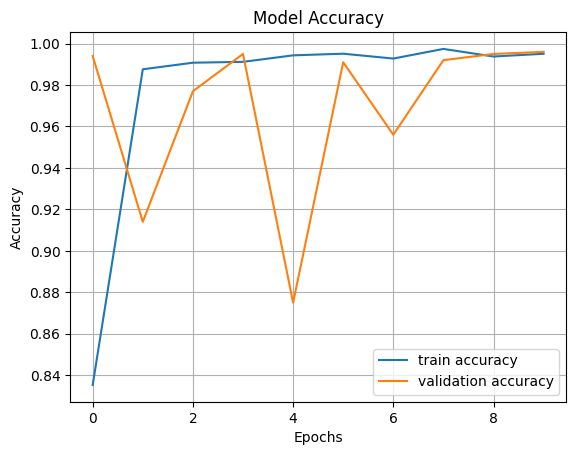

In [14]:
#accuracy plot
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
#evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9084 - loss: 0.4675
Test Loss: 0.46746721863746643, Test Accuracy: 0.9083937406539917


In [17]:
#get predictions
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
# Display the first 10 predictions
print("Predicted classes for the first 10 samples:", y_pred[:10])
# --- IGNORE ---

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Predicted classes for the first 10 samples: [ 6  5 10  0  3 21 10 14  3  7]


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print(classification_report(np.argmax(y_test, axis=1), y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       331
           1       1.00      1.00      1.00       432
           2       0.95      0.85      0.89       310
           3       0.94      0.92      0.93       245
           4       0.96      0.89      0.92       498
           5       1.00      1.00      1.00       247
           6       0.96      0.77      0.85       348
           7       0.86      0.96      0.91       436
           8       0.96      0.91      0.94       288
          10       0.97      0.86      0.91       331
          11       1.00      1.00      1.00       209
          12       0.84      1.00      0.91       394
          13       0.97      0.81      0.88       291
          14       0.76      1.00      0.86       246
          15       1.00      0.99      0.99       347
          16       0.72      1.00      0.84       164
          17       0.61      0.86      0.71       144
          18       0.83    

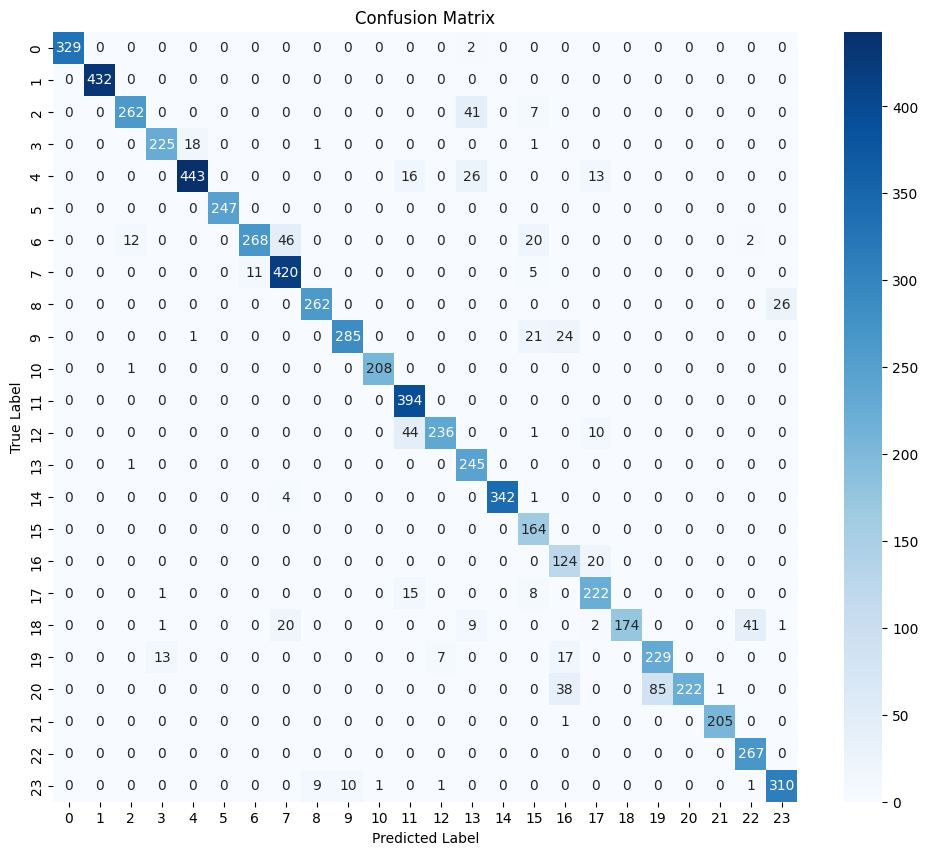

In [21]:
# Step 4: Plot confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#%pip install opencv-python


     ---------------------------------------- 39.0/39.0 MB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import cv2
import numpy as np

# Label map (0 to 24 —> A to Y, skipping J and Z)
labels_map = [chr(i) for i in range(65, 91) if i not in [74, 90]]  # A-Y (no J, Z)

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    # Flip the image (mirror view)
    frame = cv2.flip(frame, 1)

    # Define ROI box
    x1, y1, x2, y2 = 100, 100, 300, 300
    cv2.rectangle(frame, (x1,y1), (x2,y2), (255,0,0), 2)
    
    # Extract the ROI
    roi = frame[y1:y2, x1:x2]
    
    # Preprocess the ROI
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi_resized = cv2.resize(roi_gray, (28, 28))  # same as model input size
    roi_normalized = roi_resized / 255.0
    roi_reshaped = roi_normalized.reshape(1, 28, 28, 1)
    
    # Predict
    prediction = model.predict(roi_reshaped)
    predicted_class = np.argmax(prediction)
    predicted_label = labels_map[predicted_class]

    # Display the label
    cv2.putText(frame, f"Prediction: {predicted_label}", (10, 450),
                cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 2)

    # Show the frame
    cv2.imshow("Sign Language Recognition", frame)

    # Break loop with 'q' key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━

IndexError: list index out of range

: 